# Statement 2 - Employee Survey Topic Modelling

In [3]:
#Import statements
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer Bag of Words
from umap import UMAP #UMAP Dimensionality Reduction
from bertopic import BERTopic #Topic Modelling
from sentence_transformers import SentenceTransformer #Embedding model
import torch #Pytorch module

### Import the Data to have a quick peep into the text

In [ ]:
#Import data for statement 2
data = pd.read_excel(r"..\..\data\DS2-Employee-Feedback.xlsx")
data.head()

,unique_identifier,employee_feedback,department
0,3565,There's a culture of blame within the company ...,Dept A
1,7323,The company's approach to feedback and perform...,Dept A
2,5008,"While page limits have been set, some departme...",Dept A
3,3460,na,Dept A
4,2179,The culture of collaboration within our team i...,Dept A


### There are definitely some rows that have to be filtered such as the na ones

In [5]:
data[data["employee_feedback"].str.lower() == "n.a"]

,unique_identifier,employee_feedback,department
62,3885,N.A,Dept C


In [6]:
len(data)

155

In [7]:
data = data.drop(data[(data['employee_feedback'].str.lower() == "na") | 
                          (data['employee_feedback'].str.lower().str.strip() == "n.a.") |
                          (data['employee_feedback'].str.lower() == "none") |
                          (data['employee_feedback'].str.lower().str.strip() == "nil") |
                          (data['employee_feedback'].str.lower() == "no") |
                          (data['employee_feedback'].str.lower() == "nil.") |
                          (data['employee_feedback'].str.lower() == "na.") |
                          (data['employee_feedback'].str.lower() == "n.a.") |
                          (data['employee_feedback'].str.lower() == "md") |
                          (data['employee_feedback'].str.lower() == "-") |
                          (data['employee_feedback'].str.lower() == "--")].index).reset_index()

In [8]:
len(data)

144

### The number of rows has decreased by filtering out the irrelevant rows with placeholder text that do not contribute

In [9]:
data[data["employee_feedback"].str.lower() == "na."]

,index,unique_identifier,employee_feedback,department


### 1. Perform Bertopic on **default parameters** to have a visual inspection

In [10]:
docs = data["employee_feedback"]
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [11]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,132,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...
1,1,12,1_good_na_hear_wfh,"[good, na, hear, wfh, many, comments, no, be, ...","[No comments., Good, good to be hear]"


In [12]:
topic_model.get_topic(1)

[('good', 1.0881586029589583),
 ('na', 0.7516433302915633),
 ('hear', 0.7516433302915633),
 ('wfh', 0.6823830044044377),
 ('many', 0.6823830044044377),
 ('comments', 0.6823830044044377),
 ('no', 0.6131769820113188),
 ('be', 0.3630720539940404),
 ('to', 0.2628007493428674),
 ('', 1e-05)]

### There is only 2 topics and the representative words of a topic are not meaningful

In [13]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,There's a culture of blame within the company ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
1,The company's approach to feedback and perform...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,0.875078,False
2,"While page limits have been set, some departme...",0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,0.810320,False
3,The culture of collaboration within our team i...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
4,While the workload can be overwhelming at time...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
...,...,...,...,...,...,...,...,...
139,Our documentation is thorough. Onboarding new ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
140,Feedback flows freely. Suggestions to improve ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
141,Our team leads by example. The standards they ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
142,Cross-training and job shadowing help broaden ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False


### Check for GPU Acceleration since LLM will be used for text generation later

In [14]:
device = 0 if torch.cuda.is_available() else -1
print(device,"this is the device")

0 this is the device


In [15]:
from ctransformers import AutoModelForCausalLM
from transformers import AutoTokenizer, pipeline

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/zephyr-7B-alpha-GGUF",
    model_file="zephyr-7b-alpha.Q4_K_M.gguf",
    model_type="mistral",
    gpu_layers=50,
    hf=True
)
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-alpha")

# Pipeline
generator = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=50,
    repetition_penalty=1.2,
)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

CTransformersModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Device set to use cuda:0


In [16]:
prompt = """<|system|>You are a helpful, respectful and honest assistant for labeling topics..</s>
<|user|>
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please describe the profile of the employees. Make sure you describe the
profile of the employees only using the documents and keywords above.</s>
<|assistant|>"""

In [17]:
from bertopic.representation import TextGeneration

# Text generation with Zephyr
zephyr = TextGeneration(generator, prompt=prompt)
representation_model = {"Zephyr": zephyr}

### 2. Create Bertopic with **better Embedding Model**, **lower n_neighbours=3** to have more localised topics, **lower min_topic_size** requiring fewer rows to form a topic

In [18]:
vectorizer_model = CountVectorizer(stop_words="english")
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
sentence_model = SentenceTransformer("all-mpnet-base-v2")
#embeddings = sentence_model.encode(docs, show_progress_bar=False)
umap_model = UMAP(n_neighbors=3, n_components=5, min_dist=0.0, metric='cosine',random_state=42)
topic_model = BERTopic(vectorizer_model=vectorizer_model,min_topic_size=5, 
                       umap_model=umap_model,embedding_model=sentence_model,representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)

Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

In [19]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Zephyr,Representative_Docs
0,-1,7,-1_job_passion_provides_bored,"[job, passion, provides, bored, mission, organ...",[\nThe employees in this context appear to be ...,"[I feel bored and unchallenged in my job., My ..."
1,0,40,0_team_work_collaboration_positive,"[team, work, collaboration, positive, environm...",[\nThe employees mentioned in these documents ...,[The culture of collaboration within our team ...
2,1,23,1_company_day_difficult_feel,"[company, day, difficult, feel, lack, trust, c...","[\nTopic: Communication, 'Company Culture, 'Co...",[There's a lack of transparency within the com...
3,2,21,2_career_opportunities_feel_manager,"[career, opportunities, feel, manager, growth,...",[\n1|>\nTopic:\nLabel|>\n1|>\n1|>\n1|>\n1|>\n1...,[The company's commitment to professional deve...
4,3,14,3_recognition_rewards_giving_incentives,"[recognition, rewards, giving, incentives, eff...",[\nThe employees mentioned in these documents ...,[Leaders provide clear direction by giving sug...
5,4,13,4_investment_benefits_company_package,"[investment, benefits, company, package, healt...",[\nThe employees mentioned in this topic seem ...,[While the company offers competitive compensa...
6,5,10,5_work_balance_life_workload,"[work, balance, life, workload, hours, availab...",[\nThe employees in this context seem to vary ...,[While the workload can be overwhelming at tim...
7,6,9,6_good_hear_wfh_comments,"[good, hear, wfh, comments, , , , , , ]",[\nBased solely on the provided documents and ...,"[No comments., Good, good to be hear]"
8,7,7,7_feedback_reviews_performance_helpful,"[feedback, reviews, performance, helpful, year...",[\nThe employees mentioned in these documents ...,[The company's approach to feedback and perfor...


In [20]:
topic_model.visualize_heatmap()

In [21]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(docs)

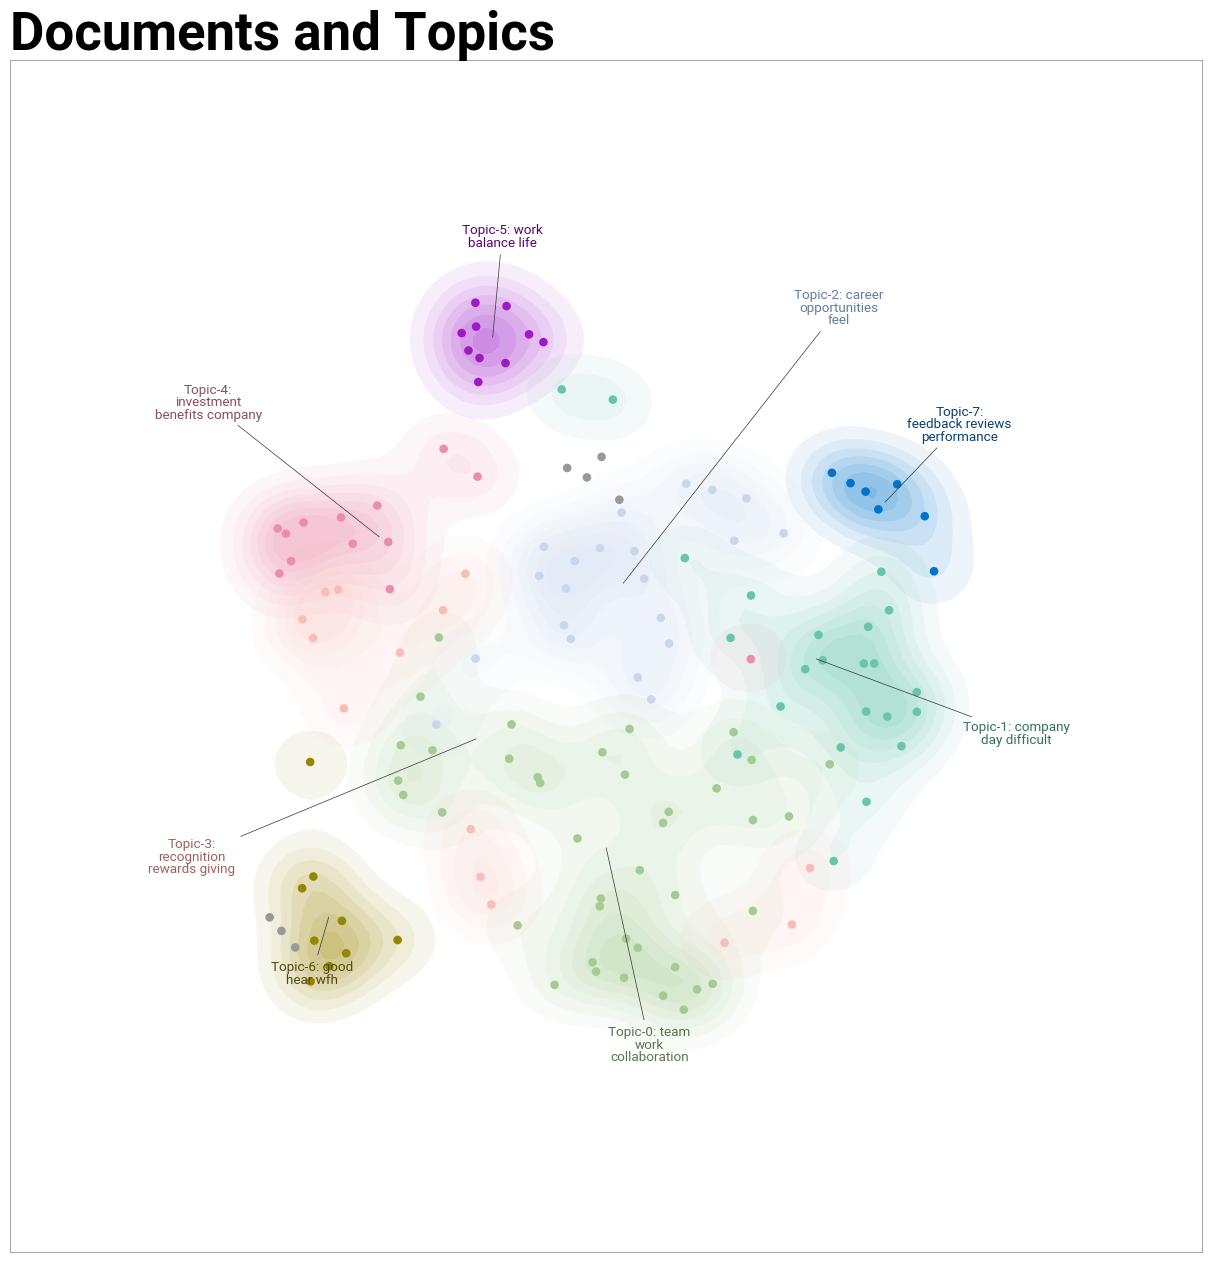

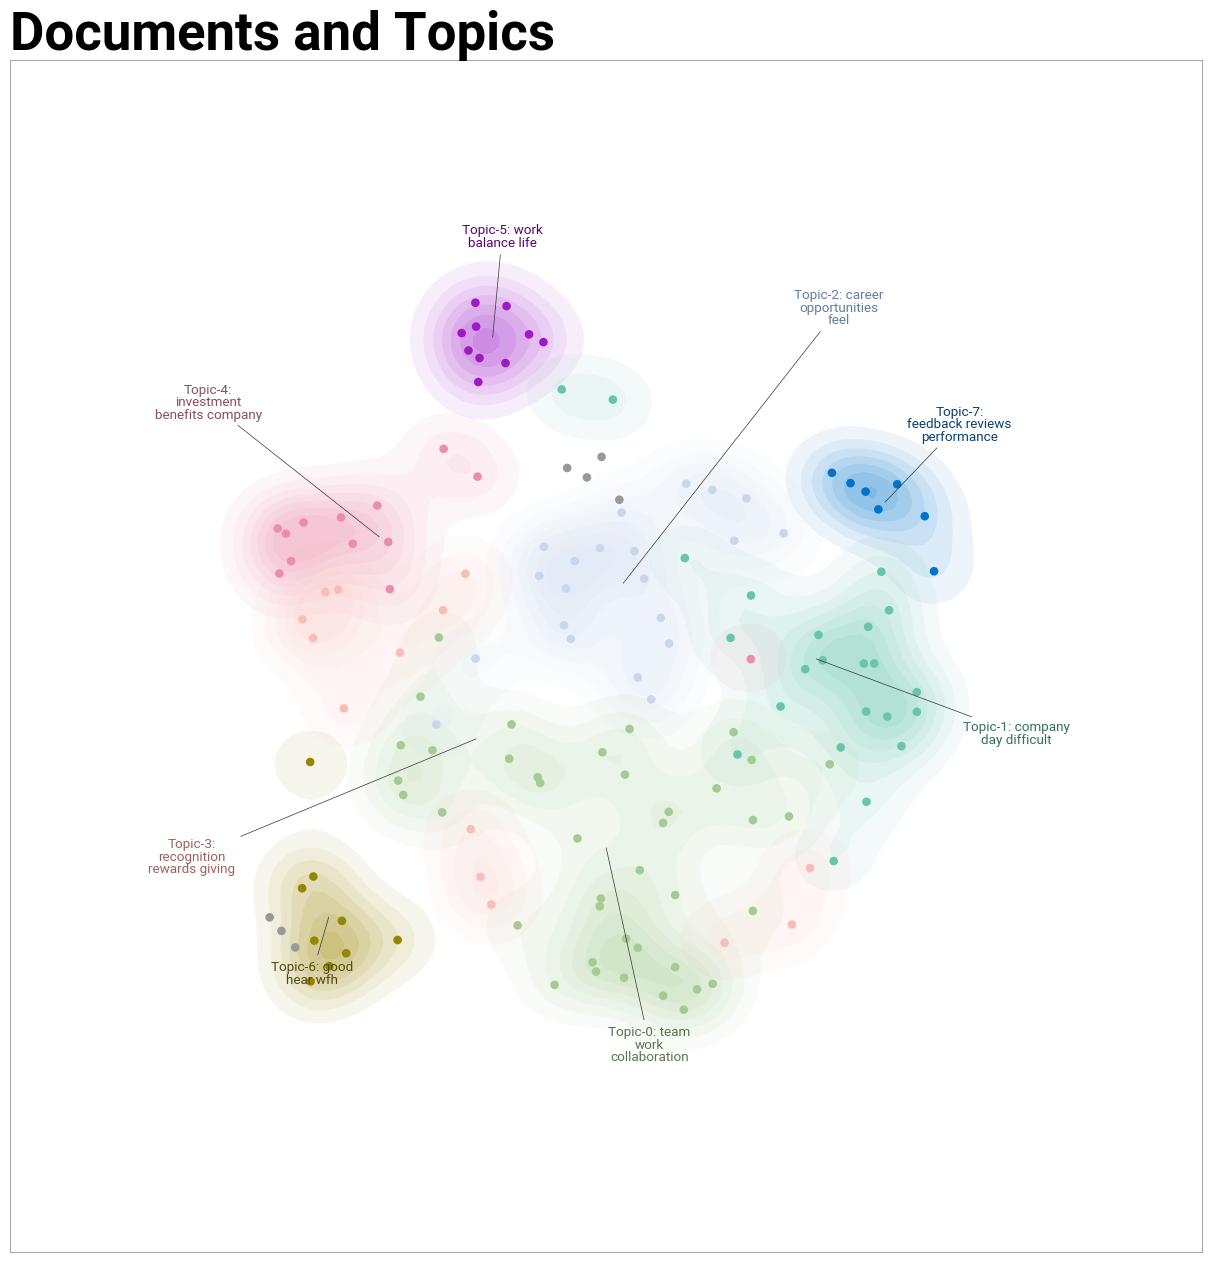

In [22]:
# with the original embeddings
topic_model.visualize_document_datamap(docs)

In [23]:
df = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_})
df.head()

,Document,Topic
0,There's a culture of blame within the company ...,1
1,The company's approach to feedback and perform...,7
2,"While page limits have been set, some departme...",0
3,The culture of collaboration within our team i...,0
4,While the workload can be overwhelming at time...,5


In [24]:
df[df["Topic"] == -1]

,Document,Topic
10,\n\n,-1
44,\n,-1
68,.,-1
96,I feel motivated and energized at work.,-1
101,I feel bored and unchallenged in my job.,-1
110,My job provides stability but lacks excitement...,-1
118,My job provides steady work and adequate compe...,-1


### There are still some outliers that are valuable and have important information

### Perform reduction of outliers to extract relevant topics

In [25]:
# Reduce outliers using the `embeddings` strategy
new_topics = topic_model.reduce_outliers(docs, topics, strategy="embeddings", threshold=0.2)

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")

topic_model.update_topics(docs, topics=new_topics, vectorizer_model=vectorizer_model)

2024-11-14 04:23:11,921 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [27]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Zephyr,Representative_Docs
0,0,40,0_team_work_collaboration_positive,"[team, work, collaboration, positive, environm...",[\nThe employees mentioned in these documents ...,[The culture of collaboration within our team ...
1,1,23,1_company_day_difficult_feel,"[company, day, difficult, feel, lack, trust, c...","[\nTopic: Communication, 'Company Culture, 'Co...",[There's a lack of transparency within the com...
2,2,24,2_feel_career_opportunities_job,"[feel, career, opportunities, job, manager, sk...",[\n1|>\nTopic:\nLabel|>\n1|>\n1|>\n1|>\n1|>\n1...,[The company's commitment to professional deve...
3,3,15,3_recognition_work_rewards_giving,"[recognition, work, rewards, giving, incentive...",[\nThe employees mentioned in these documents ...,[Leaders provide clear direction by giving sug...
4,4,13,4_investment_benefits_company_package,"[investment, benefits, company, package, like,...",[\nThe employees mentioned in this topic seem ...,[While the company offers competitive compensa...
5,5,10,5_work_balance_life_workload,"[work, balance, life, workload, hours, availab...",[\nThe employees in this context seem to vary ...,[While the workload can be overwhelming at tim...
6,6,12,6_good_hear_wfh_comments,"[good, hear, wfh, comments, , , , , , ]",[\nBased solely on the provided documents and ...,"[No comments., Good, good to be hear]"
7,7,7,7_feedback_reviews_performance_helpful,"[feedback, reviews, performance, helpful, year...",[\nThe employees mentioned in these documents ...,[The company's approach to feedback and perfor...


In [28]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(docs)

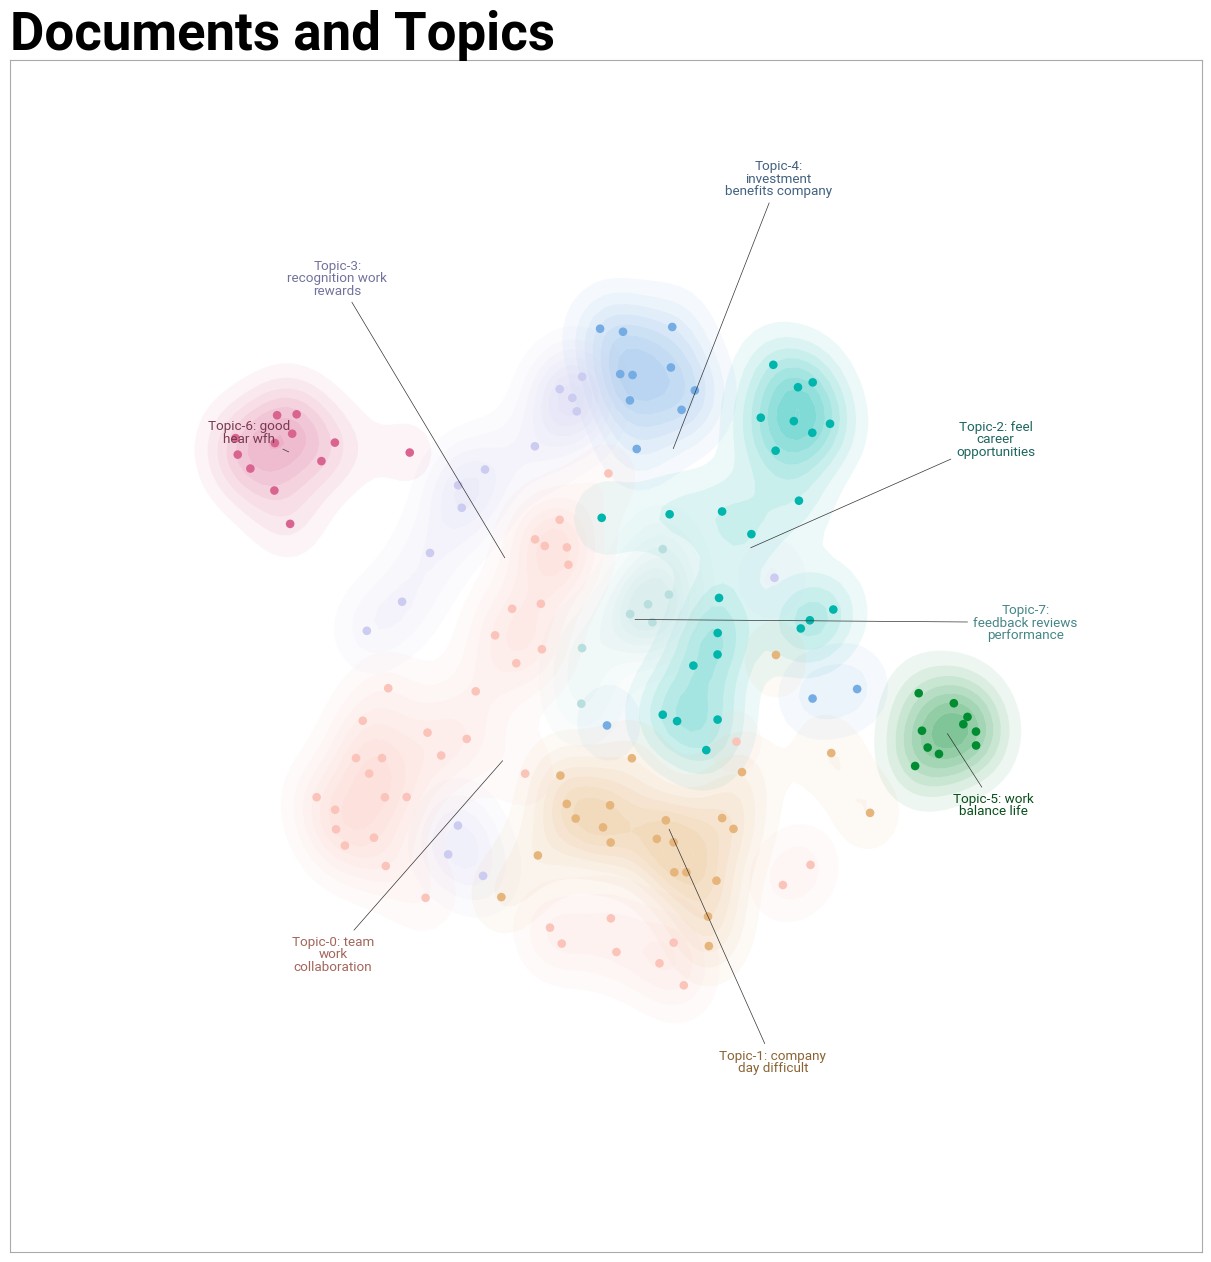

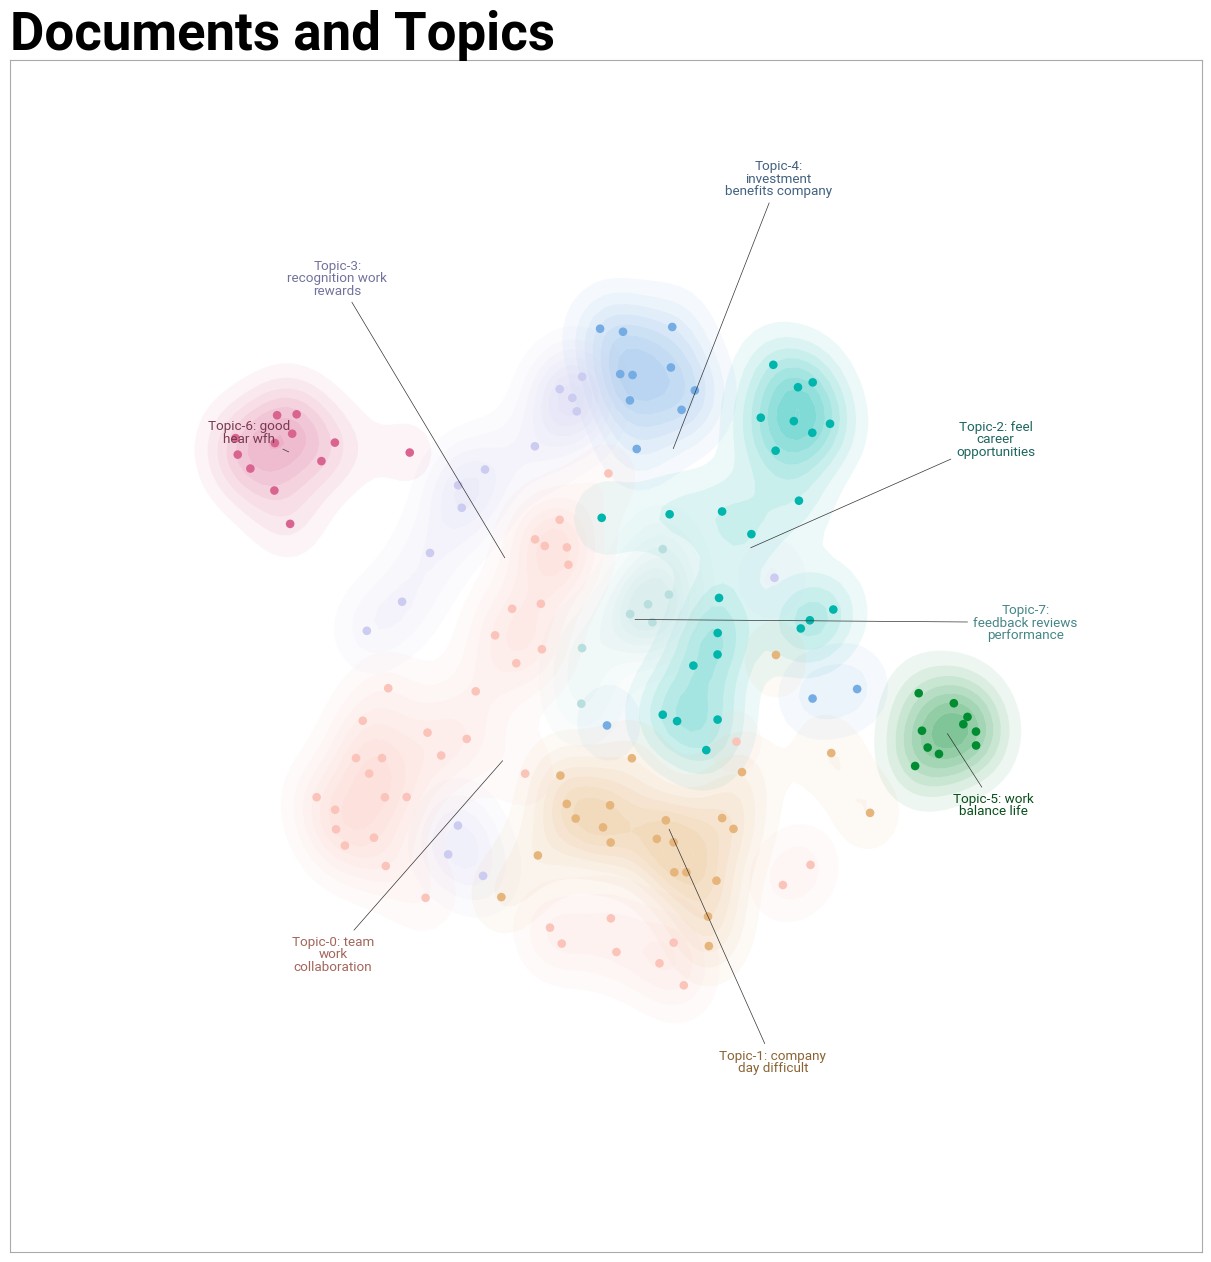

In [29]:
# with the original embeddings
topic_model.visualize_document_datamap(docs)

In [31]:
topics_per_class = topic_model.topics_per_class(docs, 
    classes=data.department)

topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)

### Extract some insights about the individuals from the topics using the more represented keywords

In [32]:
topic_model.visualize_barchart()

In [33]:
topic_model.get_topics()

{0: [('team', 0.057312456817911826),
  ('work', 0.04352476951858245),
  ('collaboration', 0.039238627522020876),
  ('positive', 0.035946686770262595),
  ('environment', 0.034648223700788586),
  ('efforts', 0.034648223700788586),
  ('culture', 0.03350740448719646),
  ('emphasis', 0.033147627709357565),
  ('diverse', 0.033147627709357565),
  ('company', 0.03161701831902845)],
 1: [('company', 0.07512805781521524),
  ('day', 0.07077331148830067),
  ('difficult', 0.06801119538620198),
  ('feel', 0.05853245730894979),
  ('lack', 0.04423331968018791),
  ('trust', 0.03955205945273405),
  ('communication', 0.037962744335155625),
  ('team', 0.037829253904944446),
  ('like', 0.03726516711546849),
  ('efficiently', 0.035070163553941255)],
 2: [('feel', 0.04489705532220581),
  ('career', 0.04370552485153665),
  ('opportunities', 0.04342757613596674),
  ('job', 0.04171506270405545),
  ('manager', 0.037321863480158556),
  ('skills', 0.036921129970913895),
  ('growth', 0.036921129970913895),
  ('plus